In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# We make a function for producing the typical forward difference matrix
def forward_diff_mat(nodes):
    return np.diag([-2]*nodes,0) + np.diag([1]*(nodes-1),1) + np.diag([1]*(nodes-1),-1)

# A function which will show the matrix as a plot with a colour bar, so we can read the values
def matshow_cbar(mat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(mat)
    fig.colorbar(cax)

# Matrix Method Finite Difference
Unstable for large t, can likely be improved

In [3]:
Nx = 301
Nt = 100000
dx = 1/(Nx-1)
dt=1e-7
x = np.linspace(0, 1, Nx)

In [4]:
dt/dx**2 # Must be small for stability

0.008999999999999998

In [5]:
# Initial wave function
psi0 = np.sqrt(2)*np.sin(np.pi*x)

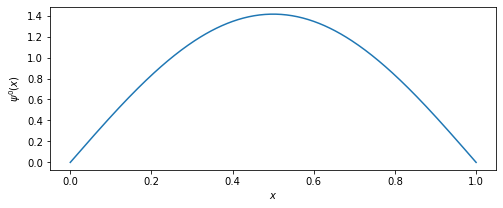

In [6]:
plt.figure(figsize=(8,3))
plt.plot(x,psi0)
plt.xlabel('$x$')
plt.ylabel('$\psi^0(x)$');

In [7]:
psi = np.zeros([Nt,Nx]) # Making a vector of psi vectors
psi[0] = psi0

In [8]:
# Setting the potential well
mu, sigma = 1/2, 1/20
V = -1e4*np.exp(-(x-mu)**2/(2*sigma**2))

Gaussian potential well
$$ V(x) = -N\left(x,\mu=\frac{L}{2},\sigma= \frac{L}{20}\right)$$

Text(0, 0.5, '$V(x)$')

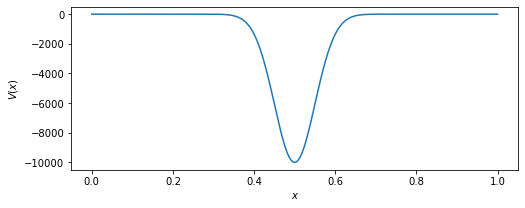

In [9]:
plt.figure(figsize=(8,3))
plt.plot(x,V)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')

$$\psi_{j}^{t+1} = \psi_j^t + \frac{i}{2}\frac{\Delta t}{\Delta x^2}\left(\psi_{j+1}^{t} -2\psi_j^t + \psi_{j-1}^{t}\right) - i \Delta tV(x)\psi_j^t$$ 

In [10]:
# Making the matrix
TriDiag = 1j/2 * dt/dx**2 *forward_diff_mat(Nx)
PsiMatrix = TriDiag + np.diag(1-1j*dt*V)

In [11]:
def compute_psi(psi):
    for t in range(0, Nt-1):
        unnormalised_psi = np.matmul(PsiMatrix,psi[t][:])
        normal = np.sum(np.absolute(unnormalised_psi )**2)*dx
        psi[t+1][:] = unnormalised_psi /normal
        
    return psi

In [12]:
psi_m1 = compute_psi(psi.astype(complex)) # Inputing our initial psi (must be complex)

Text(0.5, 1.0, 't= 0.01')

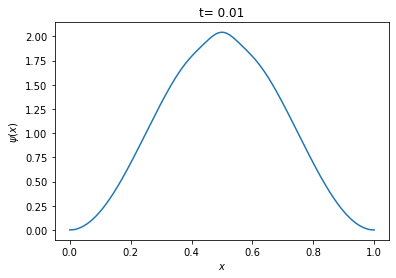

In [13]:
val = 1000
plt.plot(x, np.absolute(psi_m1[val])**2)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.title('t= ' + str(val/Nt))

Text(0.5, 1.0, 't= 0.03')

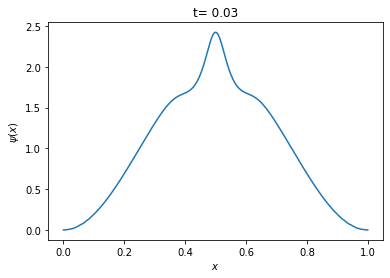

In [14]:
val = 3000
plt.plot(x, np.absolute(psi_m1[val])**2)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.title('t= ' + str(val/Nt))

Text(0.5, 1.0, 't= 0.06')

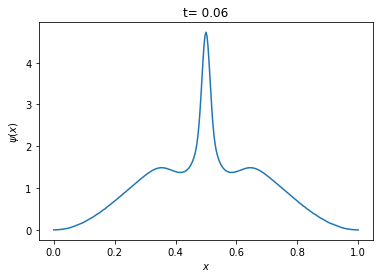

In [15]:
val = 6000
plt.plot(x, np.absolute(psi_m1[val])**2)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.title('t= ' + str(val/Nt))

Text(0.5, 1.0, 't= 0.09')

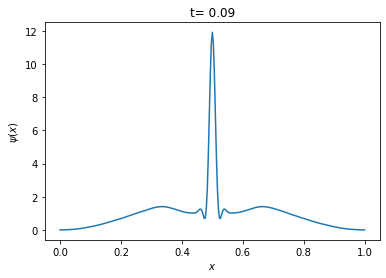

In [16]:
val = 9000
plt.plot(x, np.absolute(psi_m1[val])**2)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.title('t= ' + str(val/Nt))

Text(0.5, 1.0, 't= 0.8')

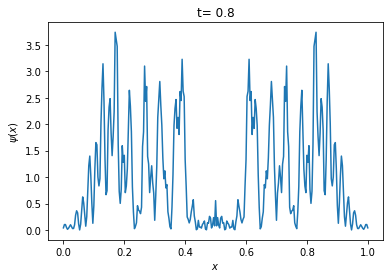

In [25]:
val = 80000
plt.plot(x, np.absolute(psi_m1[val])**2)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.title('t= ' + str(val/Nt))

Instability is visible from step 40,000 on

Text(0.5, 1.0, 't= 0.4')

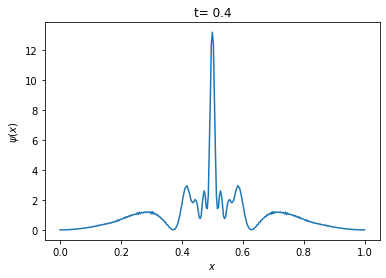

In [26]:
val = 40000
plt.plot(x, np.absolute(psi_m1[val])**2)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.title('t= ' + str(val/Nt))

Text(0.5, 1.0, 't= 0.5')

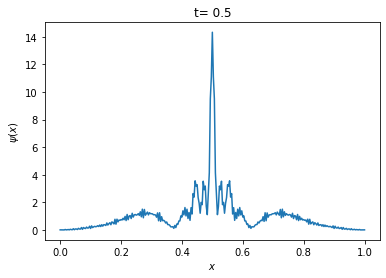

In [27]:
val = 50000
plt.plot(x, np.absolute(psi_m1[val])**2)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.title('t= ' + str(val/Nt))

# CN Method

In [29]:
# Making the matrix
TriDiag = 1j/2 * dt/dx**2 *forward_diff_mat(Nx)
back_mat = TriDiag + np.diag(1-1j*dt*V)

front_mat = -1*TriDiag

In [30]:
# Initial wave function
psi0 = np.sqrt(2)*np.sin(np.pi*x)

psi = np.zeros([Nt,Nx]) # Making a vector of psi vectors
psi[0] = psi0

In [31]:
def compute_psi_CN(psi):
    for t in range(0, Nt-1):
        B = np.matmul(back_mat,psi[t][:])
        psi[t+1][:] = np.linalg.solve(front_mat,B)  
    return psi

In [32]:
psi_CN = compute_psi(psi.astype(complex)) # Inputing our initial psi (must be complex)

Text(0.5, 1.0, 't= 0.01')

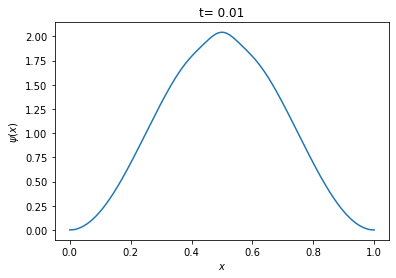

In [33]:
val = 1000
plt.plot(x, np.absolute(psi_CN[val])**2)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.title('t= ' + str(val/Nt))

Text(0.5, 1.0, 't= 0.03')

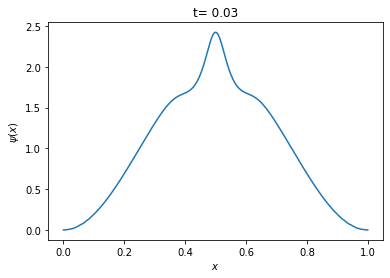

In [37]:
val = 3000
plt.plot(x, np.absolute(psi_CN[val])**2)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.title('t= ' + str(val/Nt))

Text(0.5, 1.0, 't= 0.06')

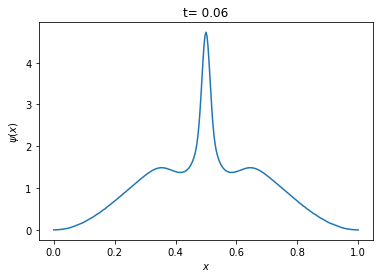

In [38]:
val = 6000
plt.plot(x, np.absolute(psi_CN[val])**2)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.title('t= ' + str(val/Nt))

Text(0.5, 1.0, 't= 0.09')

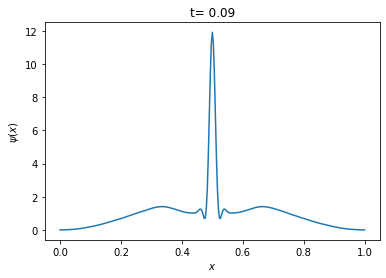

In [39]:
val = 9000
plt.plot(x, np.absolute(psi_CN[val])**2)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.title('t= ' + str(val/Nt))

Text(0.5, 1.0, 't= 0.8')

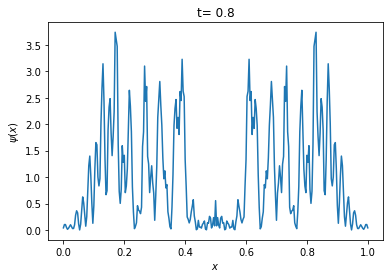

In [40]:
val = 80000
plt.plot(x, np.absolute(psi_CN[val])**2)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.title('t= ' + str(val/Nt))